In [29]:
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

In [2]:
# Read the csv files containin the tweets by Eon Musk from 2010 to 2022 for DogeCOin, Tesla, spaceX, twitter.
df_doge = pd.read_csv('csv/doge_tweets.csv')
df_spaceX = pd.read_csv('csv/spaceX_tweets.csv')
df_tesla = pd.read_csv('csv/tesla_tweets.csv')
df_twitter = pd.read_csv('csv/twitter_tweets.csv')

In [3]:
print(f"shape of doge df: " + str(df_doge.shape))
print(f"shape of spaceX df: " + str(df_spaceX.shape))
print(f"shape of tesla df: " + str(df_tesla.shape))
print(f"shape of twitter df: " + str(df_twitter.shape))

shape of doge df: (68, 8)
shape of spaceX df: (602, 8)
shape of tesla df: (1486, 8)
shape of twitter df: (89, 8)


In [4]:
df_doge.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count
0,2019-04-02,Dogecoin value may vary,NaN,20160.0,1080.0,1959.0,NaN,NaN
1,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,NaN,9063.0,558.0,2428.0,NaN,NaN
2,2019-04-02,Dogecoin rulz,NaN,138893.0,1732.0,16539.0,NaN,NaN
3,2020-04-25,Dogecoin Mode,NaN,2192.0,124.0,207.0,NaN,NaN
4,2020-07-18,"Excuse me, I only sell Doge!",NaN,15930.0,416.0,775.0,NaN,NaN


In [5]:
df_spaceX.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count
0,2011-12-24,Kanye stopped by the SpaceX rocket factory today.,NaN,117055.0,1332.0,8414.0,NaN,NaN
1,2011-12-30,China unveils ambitious space strategy,NaN,317.0,13.0,17.0,NaN,NaN
2,2011-12-30,"SpaceX has Boeing, Lockheed, Europe (Ariane) a...",NaN,453.0,20.0,49.0,NaN,NaN
3,2012-01-06,Next month is also when our Dragon spaceship d...,NaN,51.0,15.0,38.0,NaN,NaN
4,2012-01-24,Design completed for bringing rocket back to l...,NaN,331.0,35.0,146.0,NaN,NaN


In [6]:
df_tesla.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count
0,2011-12-31,Hacked my Tesla charge connector on a small is...,NaN,405.0,55.0,32.0,NaN,NaN
1,2012-01-11,The exec conf room at Tesla used to be called ...,NaN,315.0,32.0,67.0,NaN,NaN
2,2012-01-13,"A Tesla Roadster just passed the 100,000 mile ...",NaN,15.0,5.0,51.0,NaN,NaN
3,2012-01-17,That's not just paranoia (a healthy trait at t...,NaN,16.0,23.0,14.0,NaN,NaN
4,2012-01-17,Will communicate better in the future. Too man...,NaN,163.0,44.0,43.0,NaN,NaN


In [7]:
df_twitter.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count
0,2015-05-22,What are the best riddles you've heard that ar...,NaN,599.0,638.0,208.0,NaN,NaN
1,2016-04-04,Signing off from impromptu Twitter AMA. Thanks...,NaN,3252.0,241.0,367.0,NaN,NaN
2,2016-07-05,Exactly! I love Twitter.,NaN,328.0,13.0,41.0,NaN,NaN
3,2016-10-04,I use twitter for news orgs. My Insta has same...,NaN,5254.0,312.0,1598.0,NaN,NaN
4,2016-10-06,"Yeah, and several others at various times. My ...",NaN,225.0,20.0,16.0,NaN,NaN


In [32]:
vader = SentimentIntensityAnalyzer()

In [35]:
df_doge_vader = df_doge.copy()
df_spaceX_vader = df_spaceX.copy()
df_tesla_vader = df_tesla.copy()
df_twitter_vader = df_twitter.copy()

In [36]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_doge_vader["compound_sc"] = df_doge_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_doge_vader["negative_sc"] = df_doge_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_doge_vader["neutral_sc"] = df_doge_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_doge_vader["positive_sc"] = df_doge_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_doge_vader.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,compound_sc,negative_sc,neutral_sc,positive_sc
0,2019-04-02,Dogecoin value may vary,NaN,20160.0,1080.0,1959.0,NaN,NaN,0.3400,0.0,0.556,0.444
1,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,NaN,9063.0,558.0,2428.0,NaN,NaN,0.8176,0.0,0.414,0.586
2,2019-04-02,Dogecoin rulz,NaN,138893.0,1732.0,16539.0,NaN,NaN,0.0000,0.0,1.000,0.000
3,2020-04-25,Dogecoin Mode,NaN,2192.0,124.0,207.0,NaN,NaN,0.0000,0.0,1.000,0.000
4,2020-07-18,"Excuse me, I only sell Doge!",NaN,15930.0,416.0,775.0,NaN,NaN,0.1511,0.0,0.715,0.285


In [37]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_spaceX_vader["compound_sc"] = df_spaceX_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_spaceX_vader["negative_sc"] = df_spaceX_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_spaceX_vader["neutral_sc"] = df_spaceX_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_spaceX_vader["positive_sc"] = df_spaceX_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_spaceX_vader.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,compound_sc,negative_sc,neutral_sc,positive_sc
0,2011-12-24,Kanye stopped by the SpaceX rocket factory today.,NaN,117055.0,1332.0,8414.0,NaN,NaN,-0.2263,0.213,0.787,0.000
1,2011-12-30,China unveils ambitious space strategy,NaN,317.0,13.0,17.0,NaN,NaN,0.4767,0.000,0.563,0.437
2,2011-12-30,"SpaceX has Boeing, Lockheed, Europe (Ariane) a...",NaN,453.0,20.0,49.0,NaN,NaN,0.0000,0.000,1.000,0.000
3,2012-01-06,Next month is also when our Dragon spaceship d...,NaN,51.0,15.0,38.0,NaN,NaN,0.0000,0.000,1.000,0.000
4,2012-01-24,Design completed for bringing rocket back to l...,NaN,331.0,35.0,146.0,NaN,NaN,-0.2263,0.181,0.675,0.143


In [38]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_tesla_vader["compound_sc"] = df_tesla_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_tesla_vader["negative_sc"] = df_tesla_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_tesla_vader["neutral_sc"] = df_tesla_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_tesla_vader["positive_sc"] = df_tesla_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_tesla_vader.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,compound_sc,negative_sc,neutral_sc,positive_sc
0,2011-12-31,Hacked my Tesla charge connector on a small is...,NaN,405.0,55.0,32.0,NaN,NaN,-0.4019,0.172,0.828,0.000
1,2012-01-11,The exec conf room at Tesla used to be called ...,NaN,315.0,32.0,67.0,NaN,NaN,0.6616,0.000,0.826,0.174
2,2012-01-13,"A Tesla Roadster just passed the 100,000 mile ...",NaN,15.0,5.0,51.0,NaN,NaN,0.0000,0.000,1.000,0.000
3,2012-01-17,That's not just paranoia (a healthy trait at t...,NaN,16.0,23.0,14.0,NaN,NaN,0.0875,0.138,0.665,0.197
4,2012-01-17,Will communicate better in the future. Too man...,NaN,163.0,44.0,43.0,NaN,NaN,-0.0772,0.122,0.732,0.146


In [39]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_twitter_vader["compound_sc"] = df_twitter_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_twitter_vader["negative_sc"] = df_twitter_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_twitter_vader["neutral_sc"] = df_twitter_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_twitter_vader["positive_sc"] = df_twitter_vader["Tweet"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_twitter_vader.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,compound_sc,negative_sc,neutral_sc,positive_sc
0,2015-05-22,What are the best riddles you've heard that ar...,NaN,599.0,638.0,208.0,NaN,NaN,0.6369,0.0,0.741,0.259
1,2016-04-04,Signing off from impromptu Twitter AMA. Thanks...,NaN,3252.0,241.0,367.0,NaN,NaN,0.4404,0.0,0.854,0.146
2,2016-07-05,Exactly! I love Twitter.,NaN,328.0,13.0,41.0,NaN,NaN,0.6696,0.0,0.308,0.692
3,2016-10-04,I use twitter for news orgs. My Insta has same...,NaN,5254.0,312.0,1598.0,NaN,NaN,0.0000,0.0,1.000,0.000
4,2016-10-06,"Yeah, and several others at various times. My ...",NaN,225.0,20.0,16.0,NaN,NaN,0.2960,0.0,0.891,0.109


### Sentiment Analysis by TextBlob

In [16]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [17]:
#Make a copy of the df_doge df
df_doge_txtblb = df_doge.copy()

# Create 2 new columns
df_doge_txtblb["subjectivity"] = df_doge_txtblb["Tweet"].apply(getSubjectivity)
df_doge_txtblb["polarity"] = df_doge_txtblb["Tweet"].apply(getPolarity)
df_doge_txtblb['Sentiment'] = df_doge_txtblb['polarity'].apply(getAnalysis)
df_doge_txtblb.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
0,2019-04-02,Dogecoin value may vary,NaN,20160.0,1080.0,1959.0,NaN,NaN,0.000,0.000,Neutral
1,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,NaN,9063.0,558.0,2428.0,NaN,NaN,0.825,0.300,Positive
2,2019-04-02,Dogecoin rulz,NaN,138893.0,1732.0,16539.0,NaN,NaN,0.000,0.000,Neutral
3,2020-04-25,Dogecoin Mode,NaN,2192.0,124.0,207.0,NaN,NaN,0.000,0.000,Neutral
4,2020-07-18,"Excuse me, I only sell Doge!",NaN,15930.0,416.0,775.0,NaN,NaN,0.525,-0.025,Negative


In [21]:
df_doge_txtblb["Sentiment"].value_counts()

Neutral     44
Positive    19
Negative     5
Name: Sentiment, dtype: int64

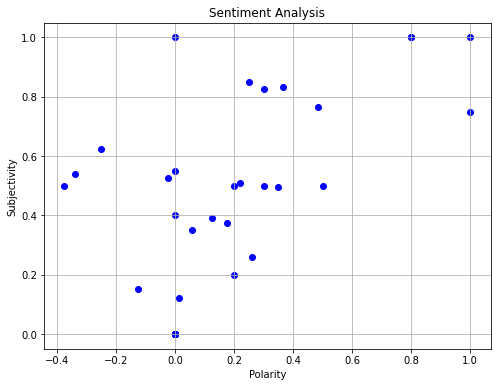

In [22]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_doge_txtblb["polarity"],df_doge_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [18]:
#Make a copy of the df_spaceX df
df_spaceX_txtblb = df_spaceX.copy()

# Create 2 new columns
df_spaceX_txtblb["subjectivity"] = df_spaceX_txtblb["Tweet"].apply(getSubjectivity)
df_spaceX_txtblb["polarity"] = df_spaceX_txtblb["Tweet"].apply(getPolarity)
df_spaceX_txtblb['Sentiment'] = df_spaceX_txtblb['polarity'].apply(getAnalysis)
df_spaceX_txtblb.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
0,2011-12-24,Kanye stopped by the SpaceX rocket factory today.,NaN,117055.0,1332.0,8414.0,NaN,NaN,0.000000,0.000000,Neutral
1,2011-12-30,China unveils ambitious space strategy,NaN,317.0,13.0,17.0,NaN,NaN,0.750000,0.250000,Positive
2,2011-12-30,"SpaceX has Boeing, Lockheed, Europe (Ariane) a...",NaN,453.0,20.0,49.0,NaN,NaN,0.400000,-0.150000,Negative
3,2012-01-06,Next month is also when our Dragon spaceship d...,NaN,51.0,15.0,38.0,NaN,NaN,0.277778,0.104167,Positive
4,2012-01-24,Design completed for bringing rocket back to l...,NaN,331.0,35.0,146.0,NaN,NaN,0.466667,-0.066667,Negative


In [23]:
df_spaceX_txtblb["Sentiment"].value_counts()

Positive    326
Neutral     193
Negative     83
Name: Sentiment, dtype: int64

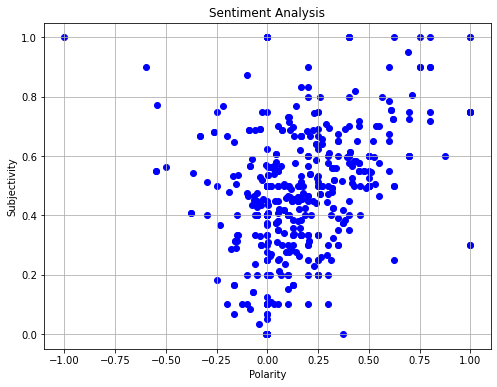

In [24]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_spaceX_txtblb["polarity"],df_spaceX_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [19]:
#Make a copy of the df_tesla df
df_tesla_txtblb = df_tesla.copy()

# Create 2 new columns
df_tesla_txtblb["subjectivity"] = df_tesla_txtblb["Tweet"].apply(getSubjectivity)
df_tesla_txtblb["polarity"] = df_tesla_txtblb["Tweet"].apply(getPolarity)
df_tesla_txtblb['Sentiment'] = df_tesla_txtblb['polarity'].apply(getAnalysis)
df_tesla_txtblb.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
0,2011-12-31,Hacked my Tesla charge connector on a small is...,NaN,405.0,55.0,32.0,NaN,NaN,0.233333,-0.125,Negative
1,2012-01-11,The exec conf room at Tesla used to be called ...,NaN,315.0,32.0,67.0,NaN,NaN,0.650000,0.350,Positive
2,2012-01-13,"A Tesla Roadster just passed the 100,000 mile ...",NaN,15.0,5.0,51.0,NaN,NaN,0.333333,0.250,Positive
3,2012-01-17,That's not just paranoia (a healthy trait at t...,NaN,16.0,23.0,14.0,NaN,NaN,0.500000,0.175,Positive
4,2012-01-17,Will communicate better in the future. Too man...,NaN,163.0,44.0,43.0,NaN,NaN,0.435000,0.150,Positive


In [25]:
df_tesla_txtblb["Sentiment"].value_counts()

Positive    891
Neutral     357
Negative    238
Name: Sentiment, dtype: int64

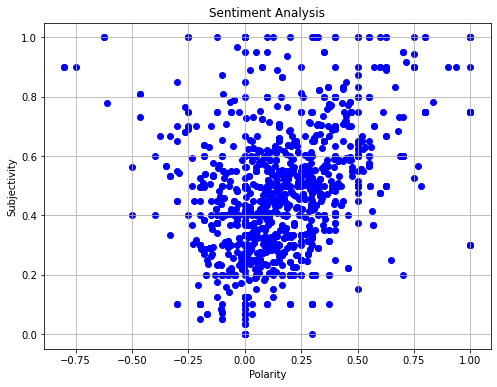

In [26]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_tesla_txtblb["polarity"],df_tesla_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [20]:
#Make a copy of the df_twitter df
df_twitter_txtblb = df_twitter.copy()

# Create 2 new columns
df_twitter_txtblb["subjectivity"] = df_twitter_txtblb["Tweet"].apply(getSubjectivity)
df_twitter_txtblb["polarity"] = df_twitter_txtblb["Tweet"].apply(getPolarity)
df_twitter_txtblb['Sentiment'] = df_twitter_txtblb['polarity'].apply(getAnalysis)
df_twitter_txtblb.head()

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
0,2015-05-22,What are the best riddles you've heard that ar...,NaN,599.0,638.0,208.0,NaN,NaN,0.366667,0.333333,Positive
1,2016-04-04,Signing off from impromptu Twitter AMA. Thanks...,NaN,3252.0,241.0,367.0,NaN,NaN,0.266667,0.191667,Positive
2,2016-07-05,Exactly! I love Twitter.,NaN,328.0,13.0,41.0,NaN,NaN,0.600000,0.500000,Positive
3,2016-10-04,I use twitter for news orgs. My Insta has same...,NaN,5254.0,312.0,1598.0,NaN,NaN,0.125000,0.000000,Neutral
4,2016-10-06,"Yeah, and several others at various times. My ...",NaN,225.0,20.0,16.0,NaN,NaN,0.262963,-0.051852,Negative


In [27]:
df_twitter_txtblb["Sentiment"].value_counts()

Positive    45
Neutral     26
Negative    18
Name: Sentiment, dtype: int64

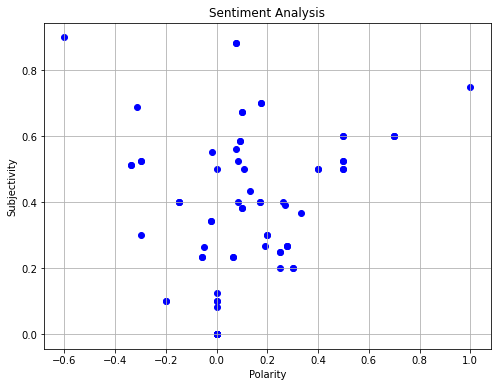

In [28]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_twitter_txtblb["polarity"],df_twitter_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()